### Лабораторная № 8

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

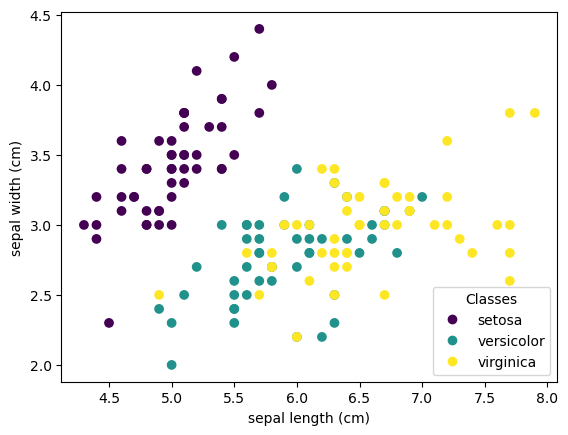

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# № 3

In [3]:

from sklearn.model_selection import train_test_split 
import numpy as np

x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train[:,:2], y_train)

print(neigh.score(x_test[:,:2], y_test))


0.7666666666666667


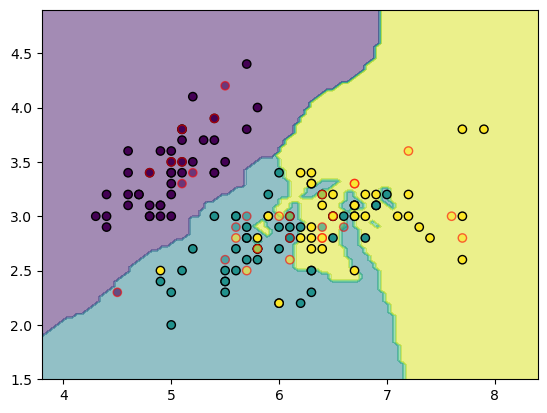

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[:, :2]
DecisionBoundaryDisplay.from_estimator(
            neigh.fit(x_train[:,:2], y_train), X, alpha=0.5, eps=0.5
)

plt.scatter(x_train[:, 0], x_train[:,1], c=y_train , edgecolors="black")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.6, edgecolor="r")

plt.show()

# № 4

In [5]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100).fit(x_train[:, :2], y_train)

print(rfc.score(x_test[:,:2], y_test))

0.7


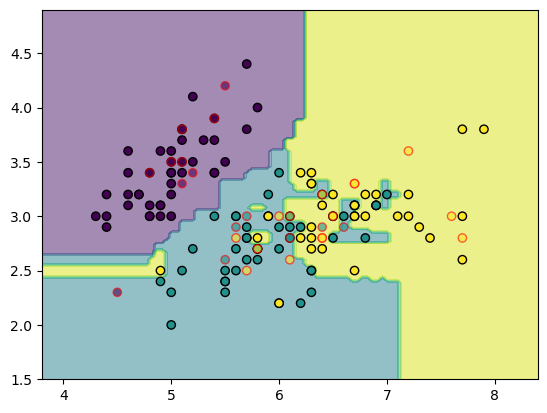

In [6]:
DecisionBoundaryDisplay.from_estimator(
            rfc, X, alpha=0.5, eps=0.5
)

plt.scatter(x_train[:, 0], x_train[:,1], c=y_train , edgecolors="black")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.6, edgecolor="r")

plt.show()

# № 5

In [7]:
from sklearn.svm import SVC

svc = SVC(gamma=1).fit(x_train[:,:2], y_train)

print(svc.score(x_test[:,:2], y_test))

0.7333333333333333


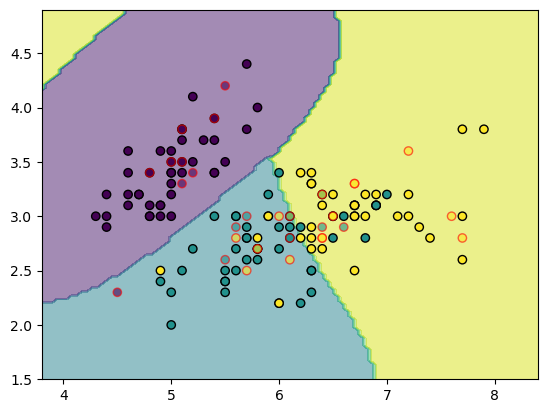

In [8]:
DecisionBoundaryDisplay.from_estimator(
            svc, X, alpha=0.5, eps=0.5
)

plt.scatter(x_train[:, 0], x_train[:,1], c=y_train , edgecolors="black")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.6, edgecolor="r")

plt.show()

# № 6

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_init='auto',n_clusters=3).fit(X)


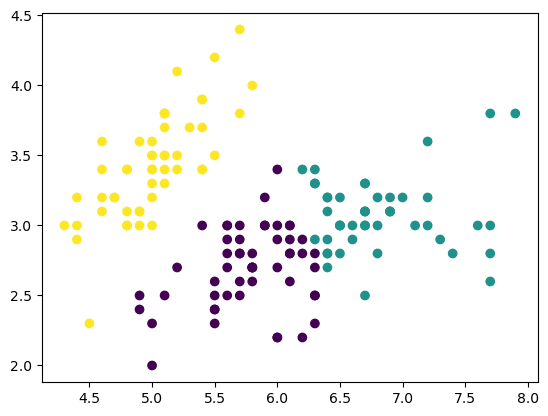

In [10]:
label = km.labels_

plt.scatter(X[:, 0], X[:, 1], c=label)

# № 7


In [11]:
from scipy.cluster.hierarchy import dendrogram 
from sklearn.cluster import AgglomerativeClustering as Ward
 
ward = Ward(distance_threshold=0, n_clusters=None, linkage='ward').fit(X)

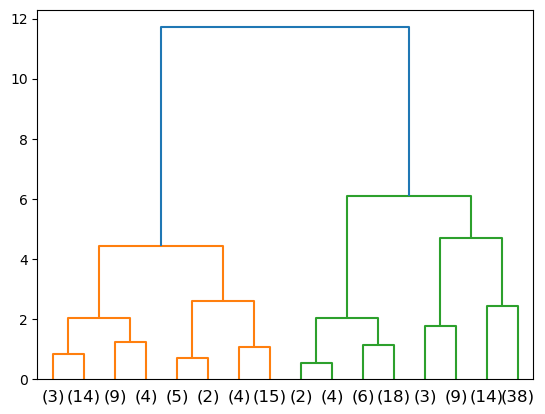

In [12]:
label = ward.labels_

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(ward, truncate_mode="level", p=3)

# № 8 

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib as mp

data = pd.read_csv("HTRU_2.csv")

print(data.head())
print(data.columns.tolist())

print(data["class"])

   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0  
['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class']
0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895  

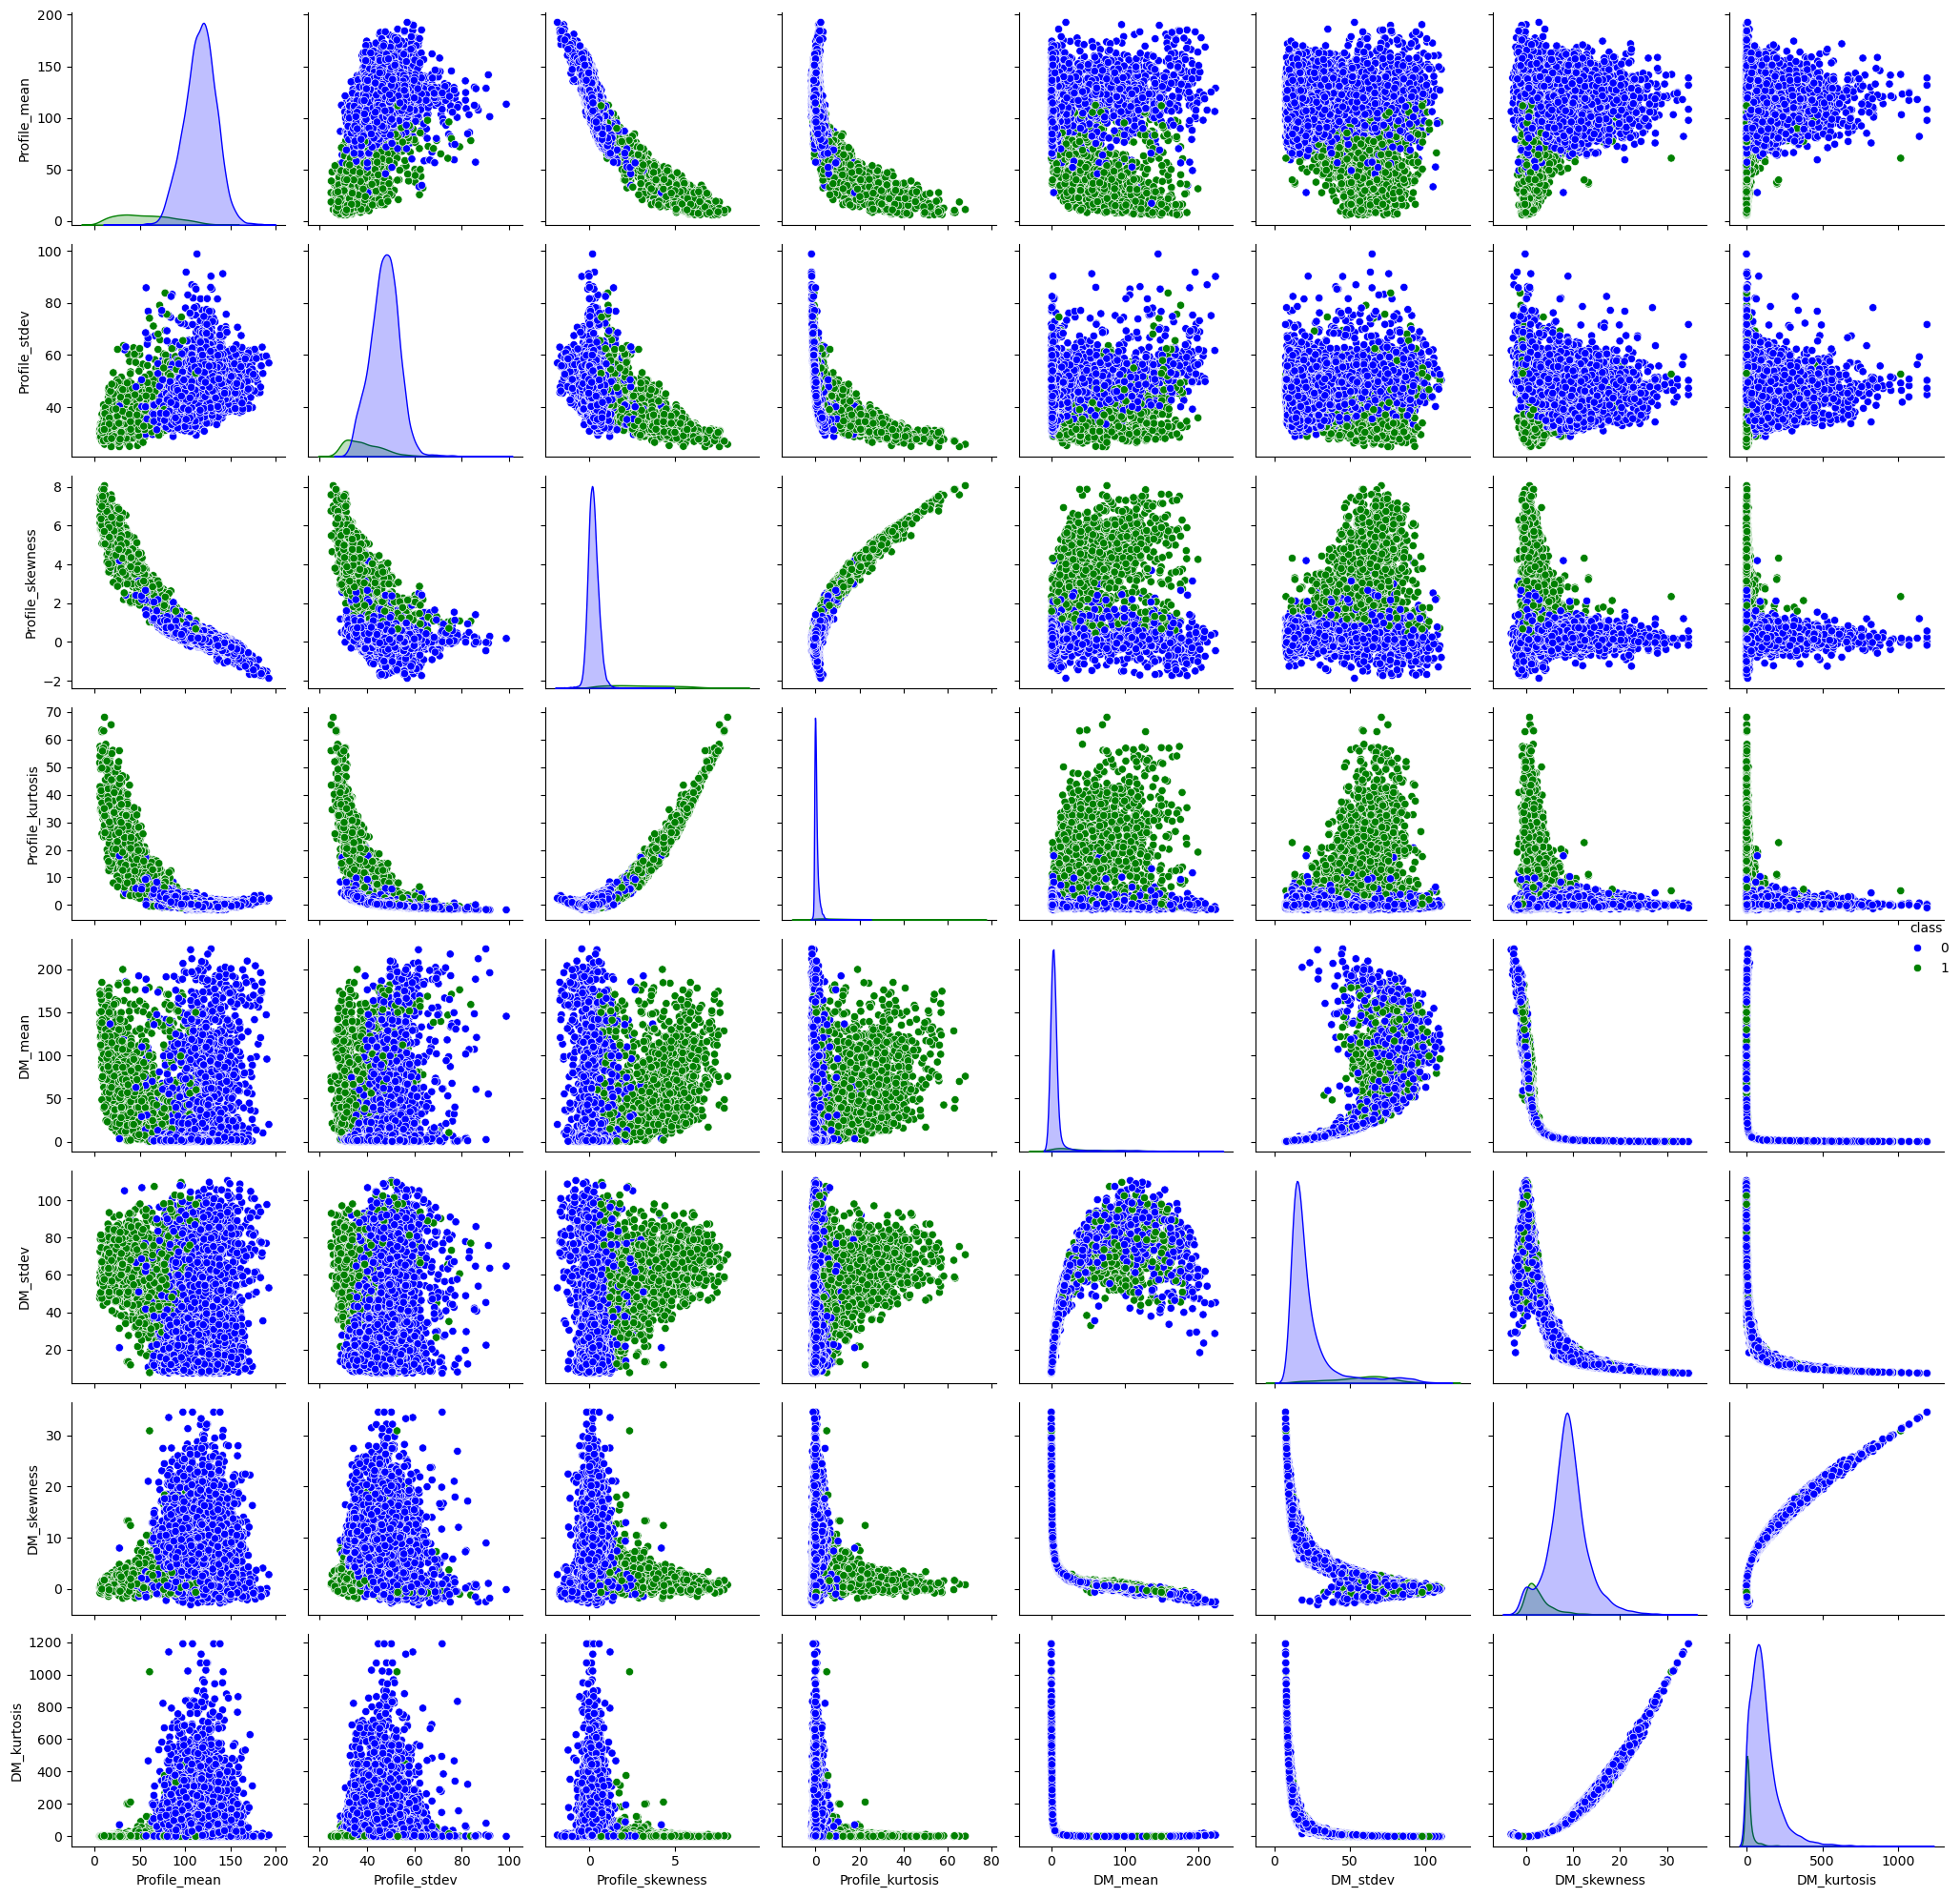

In [29]:
sns.pairplot(data=data, 
             palette=['blue', 'green'],
             hue="class",
             vars=["Profile_mean",
                   "Profile_stdev",
                    "Profile_skewness",
                    "Profile_kurtosis", 
                    "DM_mean",
                    "DM_stdev",
                    "DM_skewness", 
                    "DM_kurtosis"])

plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

classes = data["class"]

class_names = ['Not a Pulsar Star','Pulsar Star']

data.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.25, stratify=classes, random_state=4)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(max_depth=3, n_estimators= 100)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names = class_names))

                   precision    recall  f1-score   support

Not a Pulsar Star       1.00      1.00      1.00      4065
      Pulsar Star       1.00      1.00      1.00       410

         accuracy                           1.00      4475
        macro avg       1.00      1.00      1.00      4475
     weighted avg       1.00      1.00      1.00      4475



### № 10